In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import os
#from scipy.misc import imread, imresize, imshow
import datetime
import os
import cv2
from PIL import Image
from os import listdir
from os.path import isfile, join

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from skimage import io

In [ ]:
np.random.seed(30)
import random as rn
rn.seed(30)

In [ ]:
data_path="/content/gdrive/MyDrive/Colab Notebooks/data-mp4"

In [ ]:
folders = [f for f in listdir(data_path)]

In [ ]:
data_files = {}
file_count = []
for folder in folders:
    path = data_path + "/" + folder
    files = [path + "/" + f for f in listdir(path)]
    data_files[folder] = files

In [ ]:
for folder,files in data_files.items():
    file_count.append([folder, len(files)])
file_count = pd.DataFrame(file_count, columns=['Action', 'FileCount'])
file_count

,Action,FileCount
0,Pour,142
1,Stand,60
2,Sit,51
3,Run,211
4,Jump,76
5,Turn,77
6,Drink,106
7,Push,226
8,Pick,29
9,Wave,60


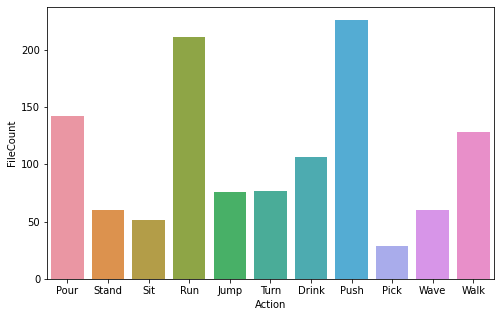

In [ ]:
plt.figure(figsize=(8,5))
sns.barplot(y = 'FileCount', x='Action', data = file_count)

In [ ]:
def plot_image(images, captions):
    f, axes = plt.subplots(1, len(images), sharey=True)
    f.set_figwidth(50)
    count = 0
    for ax,image in zip(axes, images):
        ax.imshow(image)
        ax.set_title(captions[count])
        count += 1

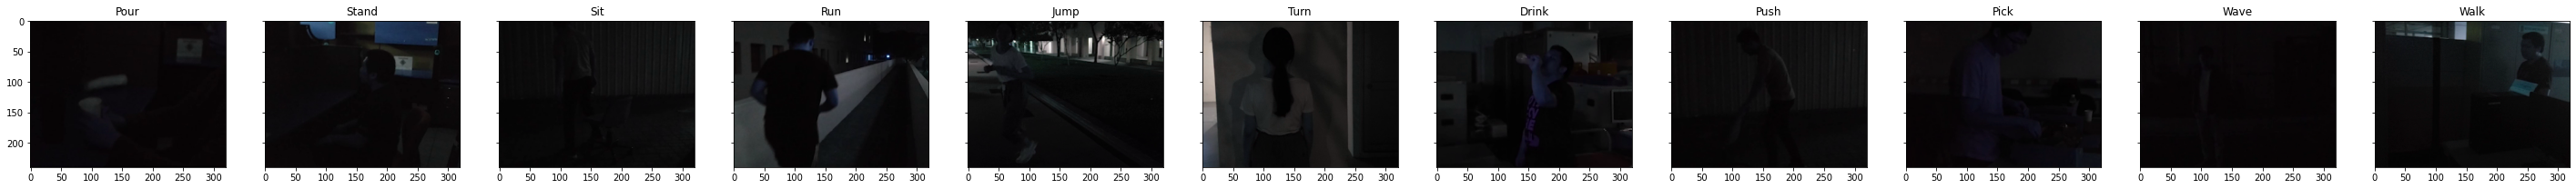

In [ ]:
images = []
captions = []
for folder,files in data_files.items():
    cam = cv2.VideoCapture(files[1])
    ret,frame = cam.read()
    images.append(frame)
    captions.append(folder)

plot_image(images, captions)

In [ ]:
import cv2
import numpy as np
import os
import warnings
from datetime import datetime as dt

from LIME import LIME as lime
from GIC import GIC as gic
from KIND import KIND as kind
from EGAN import EGAN as egan

In [ ]:
def illuminate(cur_path, method='gic', print_timespan=False):

    new_path = "/content/test/data/" + method
    if not os.path.exists(new_path):
        os.mkdir(new_path)
    
    data_paths = []

    for dirname in os.listdir(cur_path):
        print(dirname)
        print("Start time: {}".format(dt.now()))
        if '.' in dirname or dirname == 'list_cvt_v1':
            continue
        class_path = os.path.join(cur_path, dirname)
        dirpath = os.path.join(new_path, dirname)
        if not os.path.exists(dirpath):
            os.mkdir(dirpath)

        for file in os.listdir(class_path):

            # capture the video frame by frame
            clip_path = os.path.join(class_path, file)
            cap = cv2.VideoCapture(clip_path)
            
            data_paths.append(os.path.join(dirpath,file) + "\t" + dirname)

            #print(os.path.join(dirpath,file))
            begin = dt.now()
            count = 0
            while(True):
                ret, frame = cap.read()
                count += 1

                if(count > 30): #take only first 30 frames
                  break
                
                if ret == True:
                    if method.upper() == 'GIC':
                        new_frame = gic(frame)
                    if method.upper() == 'EGAN':
                        new_frame = egan(frame)
                    elif method.upper() == 'KIND':
                        new_frame = kind(frame)
                    elif method.upper() == 'LIME':
                        new_frame = lime(frame)

                    new_frame = new_frame.illuminate()
                    output_path = os.path.join(dirpath, file.replace(".", "-"))
                    if not os.path.exists(output_path):
                        os.mkdir(output_path)
                        
                    output_file = os.path.join(output_path, 'img_{:05d}'.format(count) + '.jpg')
                    #print(output_file)
                    cv2.imwrite(output_file, new_frame)

                else:
                    #print("Completed the processing of %s" %(file))
                    end = dt.now()
                    if print_timespan:
                        span = (end - begin).total_seconds()
                        #print("One video takes {} seconds to convert".format(span))
                    break
            
            cv2.destroyAllWindows()     # close all the widows opened inside the program
            cap.release                 # release the video read/write handler


        print("End time: {}".format(dt.now()))

In [ ]:
illuminate(data_path, method='gic', print_timespan=True)

In [ ]:
illuminate(data_path, method='lime', print_timespan=True)

In [ ]:
illuminate(data_path, method='egan', print_timespan=True)

In [ ]:
illuminate(data_path, method='kind', print_timespan=True)

In [ ]:
target_map = {"Drink": 0, "Jump": 1, "Pick": 2, "Pour": 3, "Push": 4, "Run": 5, "Sit": 6, "Stand": 7, "Turn": 8, "Walk": 9, "Wave": 10}

In [ ]:
import csv
from datetime import datetime as dt

data_paths = []
cur_path = data_path
new_path = data_path

for dirname in os.listdir(cur_path):
    print(dirname)
    if '.' in dirname:
        continue

    dirpath = os.path.join(new_path, dirname)
    if not os.path.exists(dirpath):
        os.mkdir(dirpath)

    class_path = cur_path + '/' + dirname
    for file in os.listdir(class_path):
      data_paths.append([os.path.join(class_path,file), int(target_map[dirname])])



data_paths = np.random.permutation(data_paths)
train_paths = data_paths[:int(len(data_paths)*70/100)]
val_paths = data_paths[len(train_paths):]

print(len(data_paths))
print(len(train_paths))
print(len(val_paths))

f = open('train_paths.csv', 'w')
writer = csv.writer(f)
for row in train_paths:
    writer.writerow(row)
f.close()

f = open('val_paths.csv', 'w')
writer = csv.writer(f)
for row in val_paths:
    writer.writerow(row)
f.close()

Pour
Stand
Sit
Run
Jump
Turn
Drink
Push
Pick
Wave
Walk
1166
816
350


In [ ]:
!pip install GPUtil

from GPUtil import showUtilization as gpu_usage
gpu_usage()    

  Created wheel for GPUtil: filename=GPUtil-1.4.0-py3-none-any.whl size=7411 sha256=10cafd876b48878b0246a97f6f4fc6424c9fbc2267f2b619b6b30d8e3e6419b0
  Stored in directory: /root/.cache/pip/wheels/6e/f8/83/534c52482d6da64622ddbf72cd93c35d2ef2881b78fd08ff0c
Successfully built GPUtil


In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
from tqdm import tqdm
import glob
import torch
import torch.utils.data as data
from torch import nn
from shutil import copyfile
from resnet import *

In [ ]:
class VideoDataset(data.Dataset):

    def __init__(self, dataset_type, meta_file, batch_size):
        self.dataset_type = dataset_type
        self.batch_size = batch_size
        self.clip_shape = (30, 240, 240)
        self.load_meta(meta_file)

        print('%s dataset: %d clips' % (dataset_type, len(self.clips)))

    def load_clip(self, filename, target):
        depth, height, width = self.clip_shape
        clip = np.zeros((3, depth, height, width), dtype=np.uint8)
        reader = cv2.VideoCapture(filename)
        if not reader.isOpened():
            print('could not open %s' % filename)
            return torch.from_numpy(clip).float()

        for i in range(depth):
            reader.grab()
            success, frame = reader.retrieve()
            if not success:
                print('could not load frame %d in %s' % (
                             start_frame + i, filename))
                break
            frame = frame[:height,:width]
            clip[:, i] = frame.transpose((2, 0, 1))

        reader.release()
        return torch.from_numpy(clip).float()

    def load_meta(self, meta_file):
        clips = []
        targets = []
        with open(meta_file) as csv_file:
          csv_reader = csv.reader(csv_file, delimiter=',')
          line_count = 0
          for row in csv_reader:
            clips.append(row[0])
            targets.append(int(row[1]))

        self.clips = clips
        self.targets = targets
        self.len = len(self.clips)

    def __getitem__(self, index):
        filename = self.clips[index]
        target = self.targets[index]
        clip = self.load_clip(filename, target)

        return clip, target

    def __len__(self):
        return self.len


In [ ]:
epochs = 20
batch_size = 3

train_dataset = VideoDataset('train', "train_paths.csv", batch_size)
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=False,
    num_workers=1, pin_memory=True, sampler=None)

eval_dataset = VideoDataset('val', "val_paths.csv", batch_size)
eval_loader = torch.utils.data.DataLoader(
    eval_dataset, batch_size=batch_size, shuffle=False,
    num_workers=1, pin_memory=True, sampler=None)

train dataset: 816 clips
val dataset: 350 clips


In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = resnet3d18(num_classes=11)
model = model.to(device)

crit = nn.CrossEntropyLoss().to(device)
opt = torch.optim.Adam(model.parameters())

torch.cuda.empty_cache()

cuda:0


In [ ]:
torch.cuda.empty_cache()

In [ ]:
torch.cuda.empty_cache()
def train(loader, model, crit, optimizer, epoch):
    model.train()

    loss_sum = 0
    for clips, targets in tqdm(loader):
      clips = clips.to(device)
      
      
      targets = torch.from_numpy(np.asarray(targets))
      targets = targets.to(device)

      logits = model(clips)
      loss = crit(logits, targets)
      loss_sum += loss.data.cpu().numpy()

      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    return (loss_sum / len(loader))

def bce(probs, labels):
    safelog =  lambda x: np.log(np.maximum(x, np.exp(-50.)))
    return np.mean(-labels * safelog(probs) - (1 - labels) * safelog(1 - probs))

def validate(loader, model, crit):
    model.eval()
    sm = nn.Softmax()
    labels = np.zeros((len(loader.dataset)), dtype=np.float32)
    probs = np.zeros((len(loader.dataset), 11), dtype=np.float32)

    with torch.no_grad():
      for i, (clips, targets) in enumerate(tqdm(loader)):
        start = i*batch_size
        end = start + clips.shape[0]
        labels[start:end] = targets
        clips = clips.to(device)

        logits = model(clips)
        probs[start:end] = sm(logits).cpu().numpy()

    #print(probs)
    probs = probs.reshape(11, -1, 1).mean(axis=0)
    labels = labels.reshape(1, -1).mean(axis=0)

    preds = probs.argmax(axis=1)
    correct = (preds == labels).sum()
    acc = correct*100//preds.shape[0]
    loss = bce(probs[:, 0], labels)
    print('validation accuracy %d%%' % acc)
    return loss

model_file = 'model.pth'
if os.path.exists(model_file):
    checkpoint = torch.load(model_file)
    model.load_state_dict(checkpoint['state_dict'])
    print('loaded %s' % model_file)

try:
    for epoch in range(epochs):
        # Train for one epoch
        train_loss = train(train_loader, model, crit, opt, epoch)

        # Evaluate on validation set
        val_loss = validate(eval_loader, model, crit)
        print('epoch %d training loss %.2f validation loss %.2f\n' % (
              epoch, train_loss, val_loss))
finally:
    torch.save({'state_dict': model.state_dict()}, model_file)

print('done')

100%|██████████| 117/117 [03:47<00:00,  1.94s/it]


validation accuracy 8%
epoch 0 training loss 2.33 validation loss 11.09



100%|██████████| 117/117 [01:13<00:00,  1.58it/s]


validation accuracy 8%
epoch 1 training loss 2.26 validation loss 11.09



100%|██████████| 117/117 [01:13<00:00,  1.58it/s]


validation accuracy 8%
epoch 2 training loss 2.27 validation loss 11.09



  0%|          | 0/272 [00:00<?, ?it/s]